Documentation\
[Basic Usage - Gymnasium Documentation](https://gymnasium.farama.org/content/basic_usage/)\
[Cart Pole - Gymnasium Documentation](https://gymnasium.farama.org/environments/classic_control/cart_pole/#cart-pole)\
[Cart Pole Control Environment in OpenAI Gym (Gymnasium)](https://aleksandarhaber.com/cart-pole-control-environment-in-openai-gym-gymnasium-introduction-to-openai-gym/)\
[Cartpole with Q-Learning Algorithm](https://aleksandarhaber.com/q-learning-in-python-with-tests-in-cart-pole-openai-gym-environment-reinforcement-learning-tutorial/)


In [2]:
# dependencies
%pip install gymnasium 
%pip install --upgrade setuptools
%pip install ez_setup
%pip install tensorflow
%pip install matplotlib
%pip install pygame
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/821.5 kB ? eta -:--:--
   --------------------------------------  819.2/821.5 kB 26.1 MB/s eta 0:00:01
   --------------------------------------- 821.5/821.5 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.1.1
    Uninstalling setuptools-69.1.1:
      Successfully uninstalled setuptools-69.1.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports
from tqdm import tqdm
import pygame
import gymnasium as gym
import tensorflow as tf
import numpy as np
import random
import matplotlib
import math
import glob
import io
import base64
from IPython import display
import time

# display plots below code
%matplotlib inline

# Set error logging level to 'ERROR'
# logger.set_level(40)

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html



In [4]:
# generate our environment
env = gym.make("CartPole-v1", render_mode="human")
# env = gym.make("CartPole-v1")

# basic info
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)
print(env.metadata)
print(env.render_mode)
print(env.reward_range)
print(env.spec)

env.close()

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
{'render_modes': ['human', 'rgb_array'], 'render_fps': 50}
human
(-inf, inf)
EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'render_mode': 'human'}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')


running one step

In [5]:
# running one step
env = gym.make("CartPole-v1", render_mode="human")
observation, info = env.reset() # initial state
# observation: cart position, cart velocity, pole angle, pole angular velocity

STEPS = 1

for _ in (range(STEPS)):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    print(f"action: {action}") # 0: push cart left, 1: push cart right
    observation, reward, terminated, truncated, info = env.step(action)
    print(f"cart position: {observation[0]}")
    print(f"cart velocity: {observation[1]}")
    print(f"pole angle: {observation[2]}")
    print(f"pole angular velocity: {observation[3]}")
    print(f"reward: {reward}")
    print(f"terminated: {terminated}")
    print(f"truncated: {truncated}")
env.close()

action: 1
cart position: -0.005432444158941507
cart velocity: 0.20817555487155914
pole angle: -0.007446924224495888
pole angular velocity: -0.33668971061706543
reward: 1.0
terminated: False
truncated: False


running one episode

In [6]:
EPISODE_COUNT = 1
STEP_COUNT = 500

env = gym.make("CartPole-v1", render_mode="human")

for episode in range(EPISODE_COUNT):
    observation, info = env.reset() # initial state
    total_reward = []
    total_step = 0
    for step in range(STEP_COUNT):
        random_action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(random_action)
        total_step += 1
        total_reward.append(reward)
        print(f"episode {episode}, step {step}, action: {random_action}, observation: {observation}")
        if terminated or truncated:
            print(f"Summary: total step: {total_step}, total reward: {np.sum(total_reward)}")
            observation, info = env.reset()
            break

env.close()

episode 0, step 0, action: 1, observation: [ 0.00959416  0.18273088  0.02833575 -0.28062376]
episode 0, step 1, action: 0, observation: [ 0.01324878 -0.01278356  0.02272327  0.02085977]
episode 0, step 2, action: 0, observation: [ 0.01299311 -0.2082239   0.02314047  0.32062465]
episode 0, step 3, action: 0, observation: [ 0.00882863 -0.40366763  0.02955296  0.62051445]
episode 0, step 4, action: 1, observation: [ 0.00075528 -0.20897059  0.04196325  0.33728373]
episode 0, step 5, action: 1, observation: [-0.00342413 -0.01447014  0.04870892  0.05812346]
episode 0, step 6, action: 1, observation: [-0.00371354  0.1799208   0.04987139 -0.21880236]
episode 0, step 7, action: 1, observation: [-1.1512080e-04  3.7429568e-01  4.5495346e-02 -4.9534607e-01]
episode 0, step 8, action: 1, observation: [ 0.00737079  0.5687475   0.03558842 -0.773351  ]
episode 0, step 9, action: 1, observation: [ 0.01874574  0.7633622   0.0201214  -1.0546274 ]
episode 0, step 10, action: 1, observation: [ 3.4012988e-0

running 10 episodes

In [7]:
EPISODE_COUNT = 5000
STEP_COUNT = 500

# env = gym.make("CartPole-v1", render_mode="human")
env = gym.make("CartPole-v1")

all_episodes_reward = []

for episode in range(EPISODE_COUNT):
    observation, info = env.reset() # initial state
    total_reward = []
    total_step = 0
    # env.render()    
    for step in range(STEP_COUNT):
        random_action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(random_action)
        total_step += 1
        total_reward.append(reward)
        # print(f"episode {episode}, step {step}, action: {random_action}, observation: {observation}")
        # time.sleep(0.05)
        
        if terminated or truncated:
            print(f"Summary: episode {episode}, total step: {total_step}, total reward: {np.sum(total_reward)}")
            observation, info = env.reset()
            all_episodes_reward.append(np.sum(total_reward))
            # time.sleep(1)
            break
    
env.close()

Summary: episode 0, total step: 13, total reward: 13.0
Summary: episode 1, total step: 11, total reward: 11.0
Summary: episode 2, total step: 20, total reward: 20.0
Summary: episode 3, total step: 33, total reward: 33.0
Summary: episode 4, total step: 32, total reward: 32.0
Summary: episode 5, total step: 10, total reward: 10.0
Summary: episode 6, total step: 15, total reward: 15.0
Summary: episode 7, total step: 29, total reward: 29.0
Summary: episode 8, total step: 36, total reward: 36.0
Summary: episode 9, total step: 25, total reward: 25.0
Summary: episode 10, total step: 16, total reward: 16.0
Summary: episode 11, total step: 13, total reward: 13.0
Summary: episode 12, total step: 26, total reward: 26.0
Summary: episode 13, total step: 14, total reward: 14.0
Summary: episode 14, total step: 11, total reward: 11.0
Summary: episode 15, total step: 22, total reward: 22.0
Summary: episode 16, total step: 21, total reward: 21.0
Summary: episode 17, total step: 22, total reward: 22.0
Su

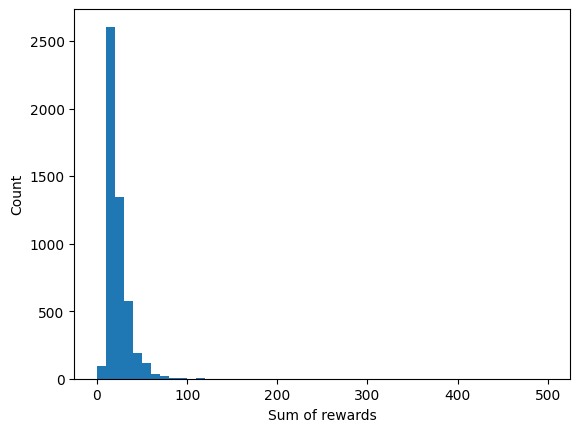

In [8]:
import matplotlib.pyplot as plt
plt.hist(all_episodes_reward, bins=50, range=(0,500))
plt.xlabel('Sum of rewards')
plt.ylabel('Count')
plt.show()